In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install pybaseball

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.0/420.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.5/312.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 13.3 MB/s eta 0:00:00


In [2]:
from pybaseball import statcast
from pybaseball import statcast_pitcher
data = statcast(start_dt="2021-06-1", end_dt="2021-06-29")

data_cleaned = data.loc[:,['pitch_type', 'game_date',  'batter', 'pitcher',  
      'stand', 'p_throws', 'home_team', 'away_team', 
        'balls', 'strikes', 'game_year', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 
       'fielder_2',  'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 
       'at_bat_number', 'pitch_number',
       'home_score', 'away_score', 'bat_score', 'fld_score', 
       'if_fielding_alignment', 'of_fielding_alignment']]




This is a large query, it may take a moment to complete


100%|██████████| 29/29 [01:04<00:00,  2.22s/it]


In [3]:
data_cleaned.head()
df = data_cleaned

In [4]:
pitchCounts = df['pitch_type'].value_counts()

for pitch, count in pitchCounts.iteritems():
    print(f"{pitch}: {count}")

#KEY

# FF = four-seam fastball
# FC = Cutter
# SL = slider
# SI= Sinker
# CH = changeup
#Cu curveball
#ST  = sweeper
#FS splitter
#SV = slurve
# KC = knuckle-curve

#replace FA as FF, CS??, st?, 

FF: 38904
SL: 20141
SI: 17778
CH: 12574
CU: 8690
FC: 7501
KC: 2496
FS: 1680
ST: 1388
SV: 304
FA: 126
KN: 57
CS: 18
EP: 17
PO: 9


<ipython-input-4-8479023973c2>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for pitch, count in pitchCounts.iteritems():


In [5]:
pitch_types_to_keep = ["FF", "FC", "SL", "SI", "CH", "CU", "KC", "FS", "ST", "SV"] 

mask = df["pitch_type"].isin(pitch_types_to_keep)
filtered_df = df[mask]
df = filtered_df
df.head()


,pitch_type,game_date,batter,pitcher,stand,p_throws,home_team,away_team,balls,strikes,...,fielder_8,fielder_9,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
3392,FF,2021-06-29,660670,621242,R,R,ATL,NYM,0,0,...,546991,624424,74,1,3,4,3,4,Infield shift,Strategic
3512,SL,2021-06-29,467055,621242,L,R,ATL,NYM,0,0,...,546991,624424,73,1,3,4,3,4,Infield shift,Strategic
3516,FF,2021-06-29,501303,621242,L,R,ATL,NYM,2,2,...,546991,624424,72,5,3,4,3,4,Infield shift,Standard
3682,FF,2021-06-29,501303,621242,L,R,ATL,NYM,2,1,...,546991,624424,72,4,3,4,3,4,Infield shift,Standard
3809,FF,2021-06-29,501303,621242,L,R,ATL,NYM,1,1,...,546991,624424,72,3,3,4,3,4,Infield shift,Standard


In [6]:
#Merge pitch types, sweeper into slider, splitter into sinker, slurve to curve
df["pitch_type"] = df["pitch_type"].replace("ST", "SL")
df["pitch_type"] = df["pitch_type"].replace("FS", "SI")
df["pitch_type"] = df["pitch_type"].replace("SV", "CU")


<ipython-input-6-45048df09127>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pitch_type"] = df["pitch_type"].replace("ST", "SL")
<ipython-input-6-45048df09127>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pitch_type"] = df["pitch_type"].replace("FS", "SI")
<ipython-input-6-45048df09127>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [7]:
df2 = df.copy()


In [8]:
import pandas as pd
#to process stand, p throws, home team, away team,
# on bases, inning top bot, if fielding, of fielding
#to drop, pitchname, gametype
rl_dict = {"R": 0, "L": 1}
df2["stand"] = df["stand"].map(rl_dict)
df2["p_throws"] = df["p_throws"].map(rl_dict)


In [9]:
unique_teams = df["home_team"].unique()
team_map = {team: i for i, team in enumerate(unique_teams)}
df2["home_team"] = df["home_team"].replace(team_map)
df2["away_team"] = df["away_team"].replace(team_map)


In [10]:
rl_dict = {"Bot": 0, "Top": 1}
df2["inning_topbot"] = df["inning_topbot"].map(rl_dict)


In [11]:
df2["if_fielding_alignment"].fillna("Standard", inplace=True)
infieldShifts = df["if_fielding_alignment"].unique()
shiftmap = {team: i for i, team in enumerate(infieldShifts)}
print(shiftmap)
df2["if_fielding_alignment"] = df2["if_fielding_alignment"].replace(shiftmap)

df2["of_fielding_alignment"].fillna("Standard", inplace=True)
outfield = df["of_fielding_alignment"].unique()
shiftmap = {team: i for i, team in enumerate(outfield)}
print(shiftmap)
df2["of_fielding_alignment"] = df2["of_fielding_alignment"].replace(shiftmap)




{'Infield shift': 0, 'Standard': 1, 'Strategic': 2, nan: 3}
{'Strategic': 0, 'Standard': 1, '4th outfielder': 2, nan: 3}


In [12]:
df2['on_1b'].fillna(0, inplace=True)
df2['on_1b'] = df2['on_1b'].map(lambda x: 0 if pd.isna(x) or x==0 else 1)
df2['on_2b'].fillna(0, inplace=True)
df2['on_2b'] = df2['on_2b'].map(lambda x: 0 if pd.isna(x) or x==0 else 1)
df2['on_3b'].fillna(0, inplace=True)
df2['on_3b'] = df2['on_3b'].map(lambda x: 0 if pd.isna(x) or x==0 else 1)

# Replace non-zero values with one


In [13]:

pitches = df["pitch_type"].unique()
pitchmap = {team: i for i, team in enumerate(pitches)}
print(pitchmap)
df2["pitch_type"] = df2["pitch_type"].replace(pitchmap)

{'FF': 0, 'SL': 1, 'CU': 2, 'SI': 3, 'FC': 4, 'CH': 5, 'KC': 6}


{'FF': 0, 'SL': 1, 'CU': 2, 'SI': 3, 'FC': 4, 'CH': 5, 'KC': 6}


In [14]:
df2.to_csv("baseball.csv", index = False)

!cp baseball.csv "/content/drive/MyDrive/colab/"

In [15]:
data = df2.copy()
#data['day'] = data['gameday'].dt.day
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111456 entries, 3392 to 4542
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   pitch_type             111456 non-null  int64         
 1   game_date              111456 non-null  datetime64[ns]
 2   batter                 111456 non-null  Int64         
 3   pitcher                111456 non-null  Int64         
 4   stand                  111456 non-null  int64         
 5   p_throws               111456 non-null  int64         
 6   home_team              111456 non-null  int64         
 7   away_team              111456 non-null  int64         
 8   balls                  111456 non-null  Int64         
 9   strikes                111456 non-null  Int64         
 10  game_year              111456 non-null  Int64         
 11  on_3b                  111456 non-null  int64         
 12  on_2b                  111456 non-null  int

In [16]:
data = df2.copy()
data['game_day'] = data['game_date'].dt.day
data.drop('game_date', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111456 entries, 3392 to 4542
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   pitch_type             111456 non-null  int64
 1   batter                 111456 non-null  Int64
 2   pitcher                111456 non-null  Int64
 3   stand                  111456 non-null  int64
 4   p_throws               111456 non-null  int64
 5   home_team              111456 non-null  int64
 6   away_team              111456 non-null  int64
 7   balls                  111456 non-null  Int64
 8   strikes                111456 non-null  Int64
 9   game_year              111456 non-null  Int64
 10  on_3b                  111456 non-null  int64
 11  on_2b                  111456 non-null  int64
 12  on_1b                  111456 non-null  int64
 13  outs_when_up           111456 non-null  Int64
 14  inning                 111456 non-null  Int64
 15  inning_topbot   

In [39]:
data.to_csv("testdata.csv", index = False)

!cp testdata.csv "/content/drive/MyDrive/colab/"

In [17]:
# Checking for NULLs in the data
(data.isnull().sum()>0).any()

False

In [18]:
# Checking for negative values in the data
(data[data<0].count()).sort_values(ascending=False)

pitch_type               0
batter                   0
fielder_3                0
fielder_4                0
fielder_5                0
fielder_6                0
fielder_7                0
fielder_8                0
fielder_9                0
at_bat_number            0
pitch_number             0
home_score               0
away_score               0
bat_score                0
fld_score                0
if_fielding_alignment    0
of_fielding_alignment    0
fielder_2.1              0
pitcher.1                0
game_pk                  0
strikes                  0
pitcher                  0
stand                    0
p_throws                 0
home_team                0
away_team                0
balls                    0
game_year                0
fielder_2                0
on_3b                    0
on_2b                    0
on_1b                    0
outs_when_up             0
inning                   0
inning_topbot            0
game_day                 0
dtype: int64

# Splitting into Test and Training Datasets

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Shuffle the dataset
data = data.sample(frac=1, random_state=42)

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.2, random_state=42)
# Save the data and labels to a CSV file
x_train.to_csv('train_data.csv', index=False)
y_train.to_csv('train_labels.csv', index=False)
x_test.to_csv('test_data.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)


In [20]:
# Balance in the label of training dataset
class_counts = 100 * y_train.value_counts() / len(y_train)
print(class_counts)

0    35.071329
1    19.258894
3    17.372482
5    11.266879
2     8.045848
4     6.742632
6     2.241936
Name: pitch_type, dtype: float64


In [21]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#A general template for various methods that we can try

In [ ]:
# Define the logistic regression model
clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=0.001, max_iter=10000, class_weight='balanced')

# Define parameter ranges for grid search
param_grid = {'penalty': ['l1','l2'],
              'C': [0.0001, 0.0005, 0.001,0.005, 0.01,0.05, 0.1,0.5, 1, 10, 100]}

# Perform grid search to find the best model parameters
clf = GridSearchCV(clf, param_grid, cv=3, scoring='roc_auc_ovr')
clf.fit(x_train, y_train.values.ravel())

# Print the best parameters and score
print("Best parameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)

# Make predictions on the test data using the best model
y_pred = clf.predict_proba(x_test)

# Calculate and print the ROC AUC score
accuracy = roc_auc_score(y_test, y_pred, multi_class='ovr')
print("ROC AUC score for the test set:", accuracy)

In [ ]:
# Deep Learning
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

def create_model(class_weights = { 0: 1, 1: 1, 2: 2, 3: 2, 4: 3, 5: 3, 6: 4}, neurons=128, dropout_rate=0.5, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons//2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons//4, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

# define the pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=30, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)

# define the grid search parameters
learning_rate = [0.001, 0.01, 0.1]
neurons = [64, 128, 256, 512]
dropout_rate = [0.2, 0.5, 0.8]
class_weights = [{0: 1/34.876183, 1: 1/19.300390, 2: 1/8.131084, 3: 1/17.536225, 4: 1/6.725809, 5: 1/11.189494, 6: 1/2.240815}, 
                 {0: 1, 1: 1, 2: 2, 3: 2, 4: 3, 5: 3, 6: 4}]
param_grid = dict(mlp__class_weights=class_weights, mlp__learning_rate=learning_rate, mlp__neurons=neurons, mlp__dropout_rate=dropout_rate)

# perform the cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc_ovr', cv=kfold, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

# print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

cv_auc_scores = grid_result.cv_results_['mean_test_score']
mean_cv_auc_score = cv_auc_scores.mean()
print("Mean CV AUC score: %.4f " % (mean_cv_auc_score))

# Test the model on the validation data
y_pred_proba = grid.predict_proba(x_test)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("AUC on test data: %.4f" % auc)

In [ ]:
#Random forest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# defining the random forest
rf = RandomForestClassifier(class_weight='balanced')
# setting parameters to try in cross validation for RandomizedSearchCV()
param_grid = {'n_estimators': np.arange(30, 60, 10),
              'max_depth': np.arange(5,9,2),
            'min_samples_split' : np.arange(5,11,5),
              'min_samples_leaf' : np.arange(5,15,5),
              'max_features': [ 0.9,0.95,0.99],
              'random_state': [42]
             }

# cross-validation to find the best parametters
rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1, scoring = 'roc_auc_ovr')

# fitting
rf.fit(x_train, y_train.values.ravel())

# printing the best parameters and score
print("Best parameters: ", rf.best_params_)
print("Best score: ", rf.best_score_)

# calculating the test accuracy
y_pred = rf.predict_proba(x_test)
auc = roc_auc_score(y_test, y_pred, multi_class = 'ovr')
print("Auc:", auc)

In [ ]:
#XGBoost
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
# defining the xgboost regressor
xgb_model = xgb.XGBClassifier()

# defining the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [40],
    'subsample': [0.5, 1],
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0.5],
    'reg_lambda': [0.2]
}

# use RandomizedSearchCV to search for best hyperparameters
xgb_model = GridSearchCV(estimator = xgb_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1, scoring = 'roc_auc_ovr')

xgb_model.fit(x_train, y_train)

# printing best parameters and best score
print("Best parameters: ", xgb_model.best_params_)
print("Best score: ", xgb_model.best_score_)

# Make predictions on the test data using the best model
y_pred = xgb_model.predict_proba(x_test)

# printing the accuracy
accuracy = roc_auc_score(y_test, y_pred, multi_class = 'ovr')
print("Accuracy score:", accuracy)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
# defining the logistic regrassion
df = DecisionTreeClassifier()

# defining parameter ranges
param_grid = {
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [3,5,7],
    'min_samples_leaf': [9,10,11,12],
    'max_features':[0.9,0.95,1]
}

# cross validation grid search to find the best parameters
df = GridSearchCV(df, param_grid = param_grid, cv=3, scoring='roc_auc_ovr')

# fitting
df.fit(x_train, y_train.values.ravel())

# printing best parameters and best score
print("Best parameters: ", df.best_params_)
print("Best score: ", df.best_score_)

# Make predictions on the test data using the best model
y_pred = df.predict_proba(x_test)

# printing the accuracy
accuracy = roc_auc_score(y_test, y_pred, multi_class='ovr')
print("Accuracy score:", accuracy)

In [ ]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from scipy.stats import uniform, randint
# defining bagging classifier
bf = BaggingClassifier()

# defining parameter ranges
param_grid = {
    'n_estimators': np.arange(10, 20,10),
    'max_samples': np.arange(0.1, 1,0.1),
    'max_features': np.arange(0.5, 1,0.1),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

bf = GridSearchCV(bf, param_grid, cv=3, scoring='roc_auc_ovr', random_state=42)

# fitting
bf.fit(x_train, y_train.values.ravel())

# printing best parameters and best score
print("Best parameters: ", bf.best_params_)
print("Best score: ", bf.best_score_)

# Make predictions on the test data using the best model
y_pred = bf.predict_proba(x_test)

# printing the accuracy
accuracy = roc_auc_score(y_test, y_pred, multi_class='ovr')
print("Accuracy score:", accuracy)

In [ ]:
#Support Vector Machines
from sklearn.svm import SVC
from scipy.stats import reciprocal, uniform
meta_model = SVC(probability=True)
param_dist = {
    'C': np.arange(0.1, 10,1),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [1],
    'gamma': ['scale', 'auto']
}
meta_model = RandomizedSearchCV(estimator = meta_model, param_distributions = param_dist, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'roc_auc_ovr')

meta_model.fit(x_train, y_train.values.ravel())
# printing the best parameters and score
print("Best parameters: ", meta_model.best_params_)
print("Best score: ", meta_model.best_score_)

# Make predictions on the test data using the best model
y_pred = meta_model.predict_proba(x_test)

# printing the accuracy
accuracy = roc_auc_score(y_test, y_pred, multi_class='ovr')
print("Accuracy score:", accuracy)

In [22]:
#Gradient Boosting
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# defining the random forest
gbc = GradientBoostingClassifier(random_state=42)

param_grid = {'n_estimators': [50],
              'learning_rate': [ 0.1],
              'max_depth': [ 10],
              'min_samples_split': [ 8],
             'max_features': ['log2'],
             'subsample': [1.0]}

# cross-validation to find the best parametters
gbc = GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1, scoring = 'roc_auc_ovr')
# fitting
gbc.fit(x_train, y_train.values.ravel())

# printing the best parameters and score
print("Best parameters: ", gbc.best_params_)
print("Best score: ", gbc.best_score_)

# calculating the test accuracy
y_pred = gbc.predict_proba(x_test)

auc = roc_auc_score(y_test, y_pred, multi_class= 'ovr')
#accuracy = accuracy_score(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred)
print("Auc:", auc)
#print("Accuracy:", accuracy)
#print("CM:", cm)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 50, 'subsample': 1.0}
Best score:  0.8473358582556809
Auc: 0.8561407269733561


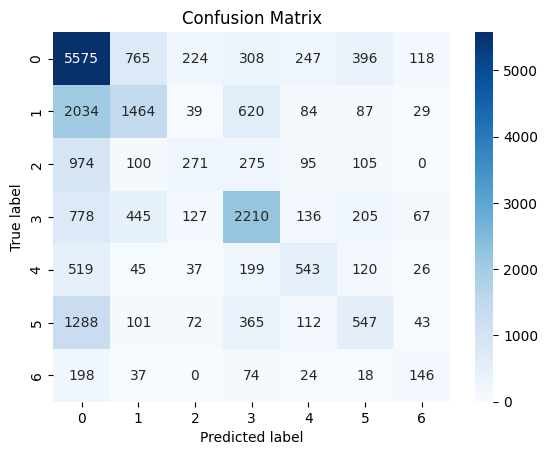

In [23]:
import matplotlib.pyplot as plt
import numpy as np
y_pred = gbc.predict(x_test)
import seaborn as sns

#auc = roc_auc_score(y_test, y_pred, multi_class= 'ovr')
#accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
#print("Auc:", auc)
# #print("Accuracy:", accuracy)
# print("CM:", cm)

# plt.figure(figsize=(8, 8))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion matrix')
# plt.colorbar()
# tick_marks = np.arange(len(np.unique(y_test)))
# plt.xticks(tick_marks, np.unique(y_test), rotation=45)
# plt.yticks(tick_marks, np.unique(y_test))
# plt.tight_layout()
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.show()

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set axis labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# show the plot
plt.show()


# from sklearn.metrics import classification_report
# # Make predictions on the test data using the best model

# # Print the classification report
# print(classification_report(y_test, y_pred))

# # extract feature importances
# importance_df = pd.DataFrame({'feature': x_train.columns, 'importance': cb_model.best_estimator_.feature_importances_})
# # plot feature importances
# plot_feature_importances(importance_df)

In [31]:
#LightGBM
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# defining the xgboost regressor
lgb_model = lgb.LGBMClassifier(random_state=42)

# defining the parameter grid to search over

# Define the hyperparameter grid to search over
param_grid = {'num_leaves': [10, 20],
              'max_depth': [5,15],
              'learning_rate': [0.01, 0.1, 1],
              'n_estimators': [40, 50, 60],
              'min_child_samples': [1, 5, 10],
              'subsample': [0.5, 0.8, 1.0],
              'colsample_bytree': [0.5, 0.8, 1.0]}

# use RandomizedSearchCV to search for best hyperparameters
lgb_model = RandomizedSearchCV(estimator = lgb_model, param_distributions = param_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'roc_auc_ovr')

lgb_model.fit(x_train, y_train.values.ravel())

# printing best parameters and best score
print("Best parameters: ", lgb_model.best_params_)
print("Best score: ", lgb_model.best_score_)

# Make predictions on the test data using the best model
y_pred = lgb_model.predict_proba(x_test)

# printing the accuracy
accuracy = roc_auc_score(y_test, y_pred, multi_class = 'ovr')
print("Accuracy score:", accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

In [25]:
#CatBoost
import catboost as cb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

# define the class weights
class_weights = [1, 1, 2,2,3,3, 4]

# define the CatBoost classifier
cb_model = cb.CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', class_weights=class_weights)

# defining the parameter grid to search over
param_grid = {
    'max_depth': np.arange(5,15,5),
    'learning_rate': np.arange(0.01,0.2,0.1),
    'n_estimators': range(70,200,20),
    'colsample_bylevel': np.arange(0.5,1,0.1),
    'reg_lambda': np.arange(0,1,0.2),
    'min_child_samples': np.arange(1, 50, 5)
}

# use RandomizedSearchCV to search for best hyperparameters
cb_model = RandomizedSearchCV(estimator = cb_model, param_distributions = param_grid, n_iter = 300, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'roc_auc_ovr')

cb_model.fit(x_train, y_train)

# printing best parameters and best score
print("Best parameters: ", cb_model.best_params_)
print("Best score: ", cb_model.best_score_)

# Make predictions on the test data using the best model
y_pred = cb_model.predict_proba(x_test)

# printing the accuracy
accuracy = roc_auc_score(y_test, y_pred, multi_class='ovr')
print("Accuracy score:", accuracy)

y_pred = cb_model.predict(x_test)
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

from sklearn.metrics import classification_report
# Make predictions on the test data using the best model
y_pred = cb_model.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# extract feature importances
importance_df = pd.DataFrame({'feature': x_train.columns, 'importance': cb_model.best_estimator_.feature_importances_})
# plot feature importances
plot_feature_importances(importance_df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.3 MB/s eta 0:00:00
Fitting 3 folds for each of 300 candidates, totalling 900 fits


ValueError: ignored

In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# define the class weights
class_weights = {0: 1, 1: 1, 2: 2, 3: 2, 4: 3, 5: 3, 6: 4}

# define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# define the AdaBoost classifier
ada_model = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# defining the parameter grid to search over
param_grid = {
    'base_estimator__max_depth': np.arange(1, 5),
    'learning_rate': np.arange(0.01, 0.2, 0.1),
    'n_estimators': range(70, 200, 20),
    'algorithm': ['SAMME', 'SAMME.R']
}

# use RandomizedSearchCV to search for best hyperparameters
ada_model = RandomizedSearchCV(estimator=ada_model, param_distributions=param_grid, n_iter=300, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc_ovr', return_train_score=True)

ada_model.fit(x_train, y_train)

# printing best parameters and best score
print("Best parameters: ", ada_model.best_params_)
print("Best score: ", ada_model.best_score_)

# Make predictions on the test data using the best model
y_pred = ada_model.predict_proba(x_test)

# printing the accuracy
accuracy = roc_auc_score(y_test, y_pred, multi_class='ovr')
print("Accuracy score:", accuracy)

from sklearn.metrics import classification_report
# Make predictions on the test data using the best model
y_pred = cb_model.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred))


In [ ]:
#Transfer Learning by Neural Networks
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Read the train and test data and labels from CSV files
x_train = pd.read_csv("train_data.csv")
x_test = pd.read_csv("test_data.csv")
y_train = pd.read_csv("train_labels.csv")
y_test = pd.read_csv("test_labels.csv")

x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train, test_size=0.1, random_state=42)

x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test = y_test.values.ravel()

clf = TabNetClassifier()
clf.fit(x_train, y_train.values.ravel(), eval_set=[(x_valid, y_valid.values.ravel())], eval_metric=['balanced_accuracy'] , 
        weights= 1, batch_size=16000, virtual_batch_size = 128, patience=10, max_epochs= 200 , drop_last= False )
preds = clf.predict(x_test)

# Print the classification report
print(classification_report(y_test, preds))
    
# Test the model on the validation data
y_pred_proba = clf.predict_proba(x_test)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("AUC on test data: %.4f" % auc)

In [ ]:
#Improved Transfer Learning by Neural Networks
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score


# Read the train and test data and labels from CSV files
x_train = pd.read_csv("train_data.csv")
x_test = pd.read_csv("test_data.csv")
y_train = pd.read_csv("train_labels.csv")
y_test = pd.read_csv("test_labels.csv")

x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train, test_size=0.1, random_state=42)

x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test = y_test.values.ravel()
y_train = y_train.values.ravel()
y_valid = y_valid.values.ravel()

num_classes = len(np.unique(y_train))


# Load pre-trained TabNet model
pretrained_model = TabNetClassifier()

# Freeze the pre-trained model
pretrained_model.tabnet.transform = tf.function(pretrained_model.tabnet.transform)
pretrained_model.tabnet.training = False

# Get the learned features from the pre-trained model
x_train_tabnet = pretrained_model.tabnet.transform(tf.convert_to_tensor(x_train)).numpy()
x_test_tabnet = pretrained_model.tabnet.transform(tf.convert_to_tensor(x_test)).numpy()

# Add your own classification layers on top of the learned features
inputs = Input(shape=(x_train_tabnet.shape[1],))
x = Dense(1024, activation='relu')(inputs)
x = Dense(512, activation='relu')(x)
concat = Concatenate()([x, x_train_tabnet])
predictions = Dense(num_classes, activation='softmax')(concat)

# Create the model by combining the pre-trained model and your own classification layers
model = Model(inputs=inputs, outputs=predictions)

# Compile the model with a suitable loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fine-tune the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_loss= ', test_loss,' Test accuracy:', test_acc)

preds = model.predict(x_test)
# Print the classification report
print(classification_report(y_test, preds))
    
# Test the model on the validation data
y_pred_proba = model.predict_proba(x_test)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("AUC on test data: %.4f" % auc)